In [ ]:
# imports
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [ ]:
# import the data
data = pd.read_csv('adult.csv')
df1 = data
data.head()

In [ ]:
# Check the null values
# Shape of data
print(data.shape)
# count null values
data.isna().sum()
data.dropna()
# shape of both dataframe is same so no null data 
print("Check shape of both data",data.shape , df1.shape) 


In [ ]:
# Check the data columns and convert it into categorical database
data.columns
# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
# State-gov, Without-pay, Never-worked.


#  there is ' ?' in workclass replace is with "not_defined" so that we can categorize
data['workclass'].unique()

In [ ]:
# Check the "?" present in workclass and replace it with "blank"
data['workclass'] = data['workclass'].replace(" ?"," blank")
data["workclass"].value_counts()

In [7]:
data['occupation'] = data['occupation'].replace(" ?"," blank")
data["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 blank                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
data['country'] = data['country'].replace(" ?"," blank")
data["country"].value_counts()

 United-States                 29170
 Mexico                          643
 blank                           583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

1. Check the dataset doesn't have null data but it has " ?" data so replaced it with " blank" in all 3 columns

In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['salary'] = encode.fit_transform(data['salary'])
data['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

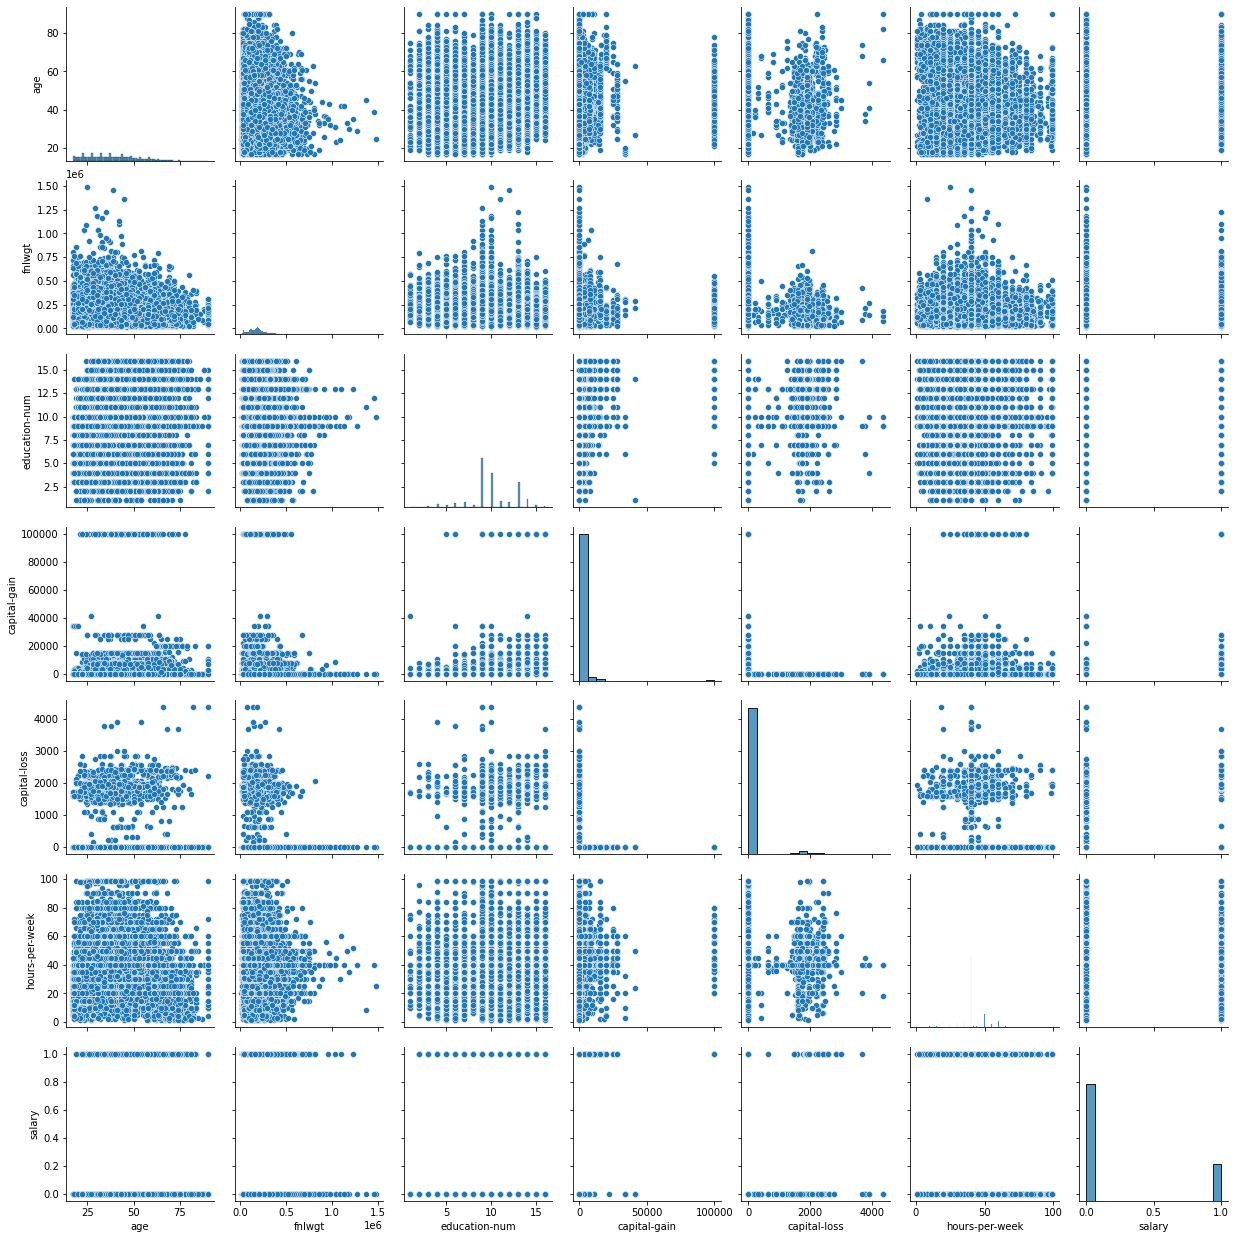

In [10]:
# trying ploting , heatmap and correlation
import seaborn as sns
sns.pairplot(data)
plt.show()

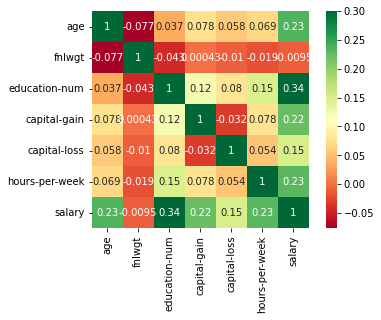

In [11]:
# Check correlation of all columns with respect to Salary as it is out Target
corr = data.corr()
sns.heatmap(corr, vmax=.3, square=True,annot=True, cmap='RdYlGn')
plt.show()

### Data Preprocessing  

In [12]:
df = df1.replace(' ?', np.nan)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [13]:
# check the null values 
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [14]:
# No null value convert 
# Convert the data into label using label encoder
from sklearn.preprocessing import LabelEncoder
# check the data columns to convert
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary             int32
dtype: object

In [15]:
# Convert all object data into cat 
for i in df.columns:
    if df[i].dtypes == 'object':
#           '''User label encoder from sklearn'''
        encod = LabelEncoder()
        df[i] = encod.fit_transform(df[i])

In [16]:
#  check the dataset 
# all objects are now in form of Numberic data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [18]:
# divide the data into target and features X and Y 
X = df.drop('salary',axis=1)
y = df['salary']
print(X.head, y.head)

<bound method NDFrame.head of        age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          6   77516          9             13               4   
1       50          5   83311          9             13               2   
2       38          3  215646         11              9               0   
3       53          3  234721          1              7               2   
4       28          3  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          3  257302          7             12               2   
32557   40          3  154374         11              9               2   
32558   58          3  151910         11              9               6   
32559   22          3  201490         11              9               4   
32560   52          4  287927         11              9               2   

       occupation  relationship  race  sex  capital-gain  capital-los

In [37]:
# we have features and target now use 70-30 ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [38]:
#  check len of train and test
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(21164, 14) (21164,) (11397, 14) (11397,)


### Data Modeling 

In [ ]:
# use KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

In [ ]:
knc = kn.predict(X_test)

In [ ]:
# Use Support vector machine
from sklearn.svm import SVC
sv = SVC(random_state=42)
sv.fit(X_train, y_train)

In [ ]:
sv_l = sv.predict(X_test)

In [ ]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)

In [ ]:
lr_l = LR.predict(X_test)

In [ ]:
# Use Gaussian Naive bayse
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)

In [ ]:
gb_l = gb.predict(X_test)

# Model Evalution

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, lr_l) * 100, 2))
print('F1 score:', round(f1_score(y_test, lr_l) * 100, 2))

In [ ]:
print('Gaussian Baiyes:')
print('Accuracy score:', round(accuracy_score(y_test, gb_l) * 100, 2))
print('F1 score:', round(f1_score(y_test, gb_l) * 100, 2))

In [ ]:
print('K nearest neighbour ALgo:')
print('Accuracy score:', round(accuracy_score(y_test, knc) * 100, 2))
print('F1 score:', round(f1_score(y_test, knc) * 100, 2))

##  Hyperparameter Tunig 

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
n_e = [int(x) for x in np.linspace(start=35, stop=150, num=15)]
max_d = [int(x) for x in np.linspace(35, 150, num=15)]

In [29]:
p_dict = {'n_e': n_e,'max_d': max_d}

In [32]:
tune = RandomForestClassifier(random_state=42)
rf = RandomizedSearchCV(estimator=tune, param_distributions=p_dict, cv=5, random_state=42)